# Mobile Games A/B Testing - Cookie Cats

## Introduction
This ab test will be focusing on how gate placement in the game Cookie Cats affects user retention. When we move the first gate from level 30 to level 40, how are players going to impact?  

## About Dataset
### Context
This dataset includes A/B test results of Cookie Cats to examine what happens when the first gate in the game was moved from level 30 to level 40. When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.  

### Content
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

**userid:** A unique number that identifies each player.  
**version:** Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).  
**sum_gamerounds:** the number of game rounds played by the player during the first 14 days after install.  
**retention_1:** Did the player come back and play 1 day after installing?  
**retention_7:** Did the player come back and play 7 days after installing?  

When a player installed the game, he or she was randomly assigned to either.   



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


## 1. check for missing values and duplicates

In [4]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [5]:
df.duplicated().sum()

0

## 2. Analysis

### games played in the first 14 days

In [7]:
# lets see how many rows in each AB group
df.groupby('version')['userid'].count()

# both version have similar numbers

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [13]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9ffda85360>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9ffda858a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9ffda850c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9ffda85de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ffda86080>],
 'means': []}

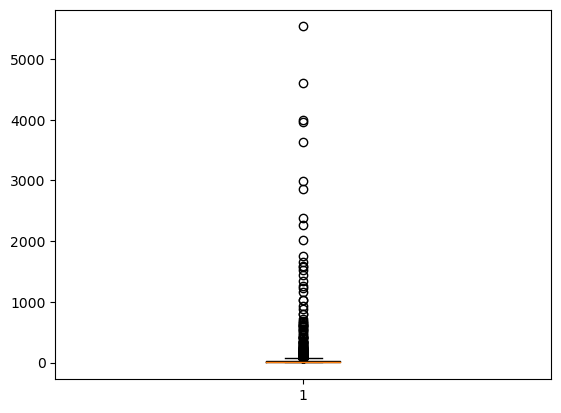

In [14]:
df_gamerounds = df.groupby('sum_gamerounds')['userid'].count()
plt.boxplot(df_gamerounds)

Text(0, 0.5, 'User Count')

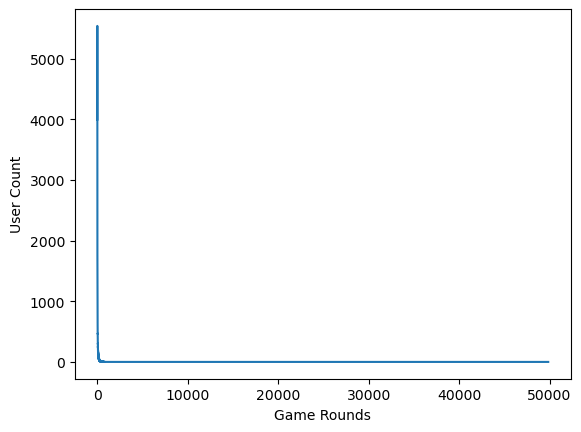

In [18]:
# lets see the distribution of users playing the game during first 14 days after installing
ax = df_gamerounds.plot(x="sum_gamerounds", y="userid")
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()

# since the range is too wide, the plot is not very informative, lets set the game round to 200

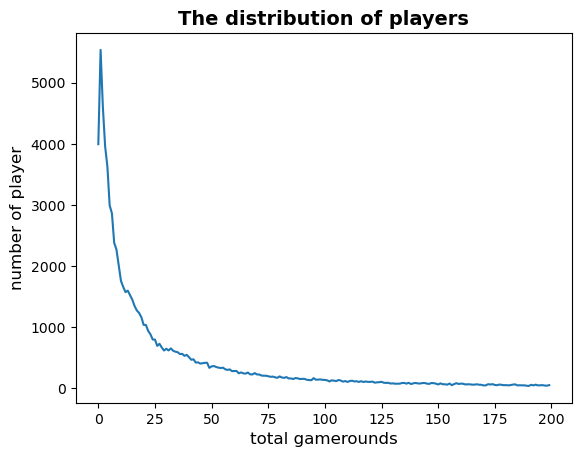

In [20]:
ax = df_gamerounds.head(200).plot(x="sum_gamerounds", y="userid")
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()


In [22]:
df[df['sum_gamerounds']==0]['userid'].count()

3994

The distribution is skewed, most players play less than 50 games after installing.  
3994 players did not play the game at all after installing. A good point to figure out the reason.

### Comparing Retention - 1
Did the player come back and play 1 day after installing?  

Q1: Overall percentage of players coming back to play the game after 1 day.  
total player coming back / total player count

Q2: Percentage of players coming back to play after 1 day for each version.  

In [29]:
# The overall perc of users that came back the day after they installed
cb_1_day = df['retention_1'].sum() / df['retention_1'].count()
perc_cb_1_day = round(cb_1_day*100, 1)
print(perc_cb_1_day, '% of overall players come back and play 1 day after installing.')


44.5 % of overall players come back and play 1 day after installing.


In [45]:
cb_1_day_ab = df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count()
perc_cb_1_day_a = round((cb_1_day_ab.loc[cb_1_day_ab.index=='gate_30'].values[0])*100, 1)
perc_cb_1_day_b = round((cb_1_day_ab.loc[cb_1_day_ab.index=='gate_40'].values[0])*100, 1)

print(perc_cb_1_day_a, '% of a version players come back and play 1 day after installing.')
print(perc_cb_1_day_b, '% of b version players come back and play 1 day after installing.')


44.8 % of a version players come back and play 1 day after installing.
44.2 % of b version players come back and play 1 day after installing.


From the result, we can see that there is a slightly drop in user retention when the gate is moved to level 40 compared to when it is level 30.   

However, are we sure that putting gate at level 40 will be worse in the future too? To confirm this theory, we use bootstraping to find out.  

### Bootstraping
Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), and falls under the broader class of resampling methods.  
The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample).  

Refer: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

In [ ]:
x

### Comparing Retention - 7
Did the player come back and play 7 days after installing?  

Q1: Overall percentage of players coming back to play the game after 7 days.  
Q2: Percentage of players coming back to play after 7 days for each version.  